In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('../inputs/train.csv')

In [3]:
df.head(5)

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,...,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP,Criminal
0,25095143,4,2,4,1,3,1,1,1,99,...,1,2,1,1,2,2,3884.805998,40026,1,0
1,13005143,4,1,3,1,2,1,1,1,99,...,2,2,2,3,2,2,1627.108106,40015,2,1
2,67415143,4,1,2,1,2,1,1,1,99,...,2,2,2,3,2,2,4344.957980,40024,1,0
3,70925143,4,0,2,1,1,1,1,1,99,...,2,2,1,1,2,2,792.521931,40027,1,0
4,75235143,1,0,6,1,4,1,1,1,99,...,2,2,2,2,2,2,1518.118526,40001,2,0


In [4]:
col_dsc_dict = {'PERID':  "Person ID",
'IFATHER':  "FATHER IN HOUSEHOLD",
'NRCH17_2':  "RECODED # R's CHILDREN < 18 IN HOUSEHOLD",
'IRHHSIZ2':  "RECODE - IMPUTATION-REVISED # PERSONS IN HH",
'IIHHSIZ2':  "IMPUTATION INDICATOR",
'IRKI17_2':  "IMPUTATION-REVISED # KIDS AGED<18 IN HH",
'IIKI17_2':  "IRKI17_2-IMPUTATION INDICATOR",
'IRHH65_2':  "REC - IMPUTATION-REVISED # OF PER IN HH AGED>=65",
'IIHH65_2':  "IRHH65_2-IMPUTATION INDICATOR",
'PRXRETRY':  "SELECTED PROXY UNAVAILABLE, OTHER PROXY AVAILABLE?",
'PRXYDATA':  "IS PROXY ANSWERING INSURANCE/INCOME QS",
'MEDICARE':  "COVERED BY MEDICARE",
'CAIDCHIP':  "COVERED BY MEDICAID/CHIP",
'CHAMPUS':  "COV BY TRICARE, CHAMPUS, CHAMPVA, VA, MILITARY",
'PRVHLTIN':  "COVERED BY PRIVATE INSURANCE",
'GRPHLTIN':  "PRIVATE PLAN OFFERED THROUGH EMPLOYER OR UNION",
'HLTINNOS':  "COVERED BY HEALTH INSUR",
'HLCNOTYR':  "ANYTIME DID NOT HAVE HEALTH INS/COVER PAST 12 MOS",
'HLCNOTMO':  "PAST 12 MOS, HOW MANY MOS W/O COVERAGE",
'HLCLAST':  "TIME SINCE LAST HAD HEALTH CARE COVERAGE",
'HLLOSRSN':  "MAIN REASON STOPPED COVERED BY HEALTH INSURANCE",
'HLNVCOST':  "COST TOO HIGH",
'HLNVOFFR':  "EMPLOYER DOESN'T OFFER",
'HLNVREF':  "INSURANCE COMPANY REFUSED COVERAGE",
'HLNVNEED':  "DON'T NEED IT",
'HLNVSOR':  "NEVER HAD HLTH INS SOME OTHER REASON",
'IRMCDCHP':  "IMPUTATION REVISED CAIDCHIP",
'IIMCDCHP':  "MEDICAID/CHIP - IMPUTATION INDICATOR",
'IRMEDICR':  "MEDICARE - IMPUTATION REVISED",
'IIMEDICR':  "MEDICARE - IMPUTATION INDICATOR",
'IRCHMPUS':  "CHAMPUS - IMPUTATION REVISED",
'IICHMPUS':  "CHAMPUS - IMPUTATION INDICATOR",
'IRPRVHLT':  "PRIVATE HEALTH INSURANCE - IMPUTATION REVISED",
'IIPRVHLT':  "PRIVATE HEALTH INSURANCE - IMPUTATION INDICATOR",
'IROTHHLT':  "OTHER HEALTH INSURANCE - IMPUTATION REVISED",
'IIOTHHLT':  "OTHER HEALTH INSURANCE - IMPUTATION INDICATOR",
'HLCALLFG':  "FLAG IF EVERY FORM OF HEALTH INS REPORTED",
'HLCALL99':  "YES TO MEDICARE/MEDICAID/CHAMPUS/PRVHLTIN",
'ANYHLTI2':  "COVERED BY ANY HEALTH INSURANCE - RECODE",
'IRINSUR4':  "RC-OVERALL HEALTH INSURANCE - IMPUTATION REVISED",
'IIINSUR4':  "RC-OVERALL HEALTH INSURANCE - IMPUTATION INDICATOR",
'OTHINS':  "RC-OTHER HEALTH INSURANCE",
'CELLNOTCL':  "NOT A CELL PHONE",
'CELLWRKNG':  "WORKING CELL PHONE",
'IRFAMSOC':  "FAM RECEIVE SS OR RR PAYMENTS - IMPUTATION REVISED",
'IIFAMSOC':  "FAM RECEIVE SS OR RR PAYMENTS - IMPUTATION INDICATOR",
'IRFAMSSI':  "FAM RECEIVE SSI - IMPUTATION REVISED",
'IIFAMSSI':  "FAM RECEIVE SSI - IMPUTATION INDICATOR",
'IRFSTAMP':  "RESP/OTH FAM MEM REC FOOD STAMPS - IMPUTATION REVISED",
'IIFSTAMP':  "RESP/OTH FAM MEM REC FOOD STAMPS - IMPUTATION INDICATOR",
'IRFAMPMT':  "FAM RECEIVE PUBLIC ASSIST - IMPUTATION REVISED",
'IIFAMPMT':  "FAM RECEIVE PUBLIC ASSIST - IMPUTATION INDICATOR",
'IRFAMSVC':  "FAM REC WELFARE/JOB PL/CHILDCARE - IMPUTATION REVISED",
'IIFAMSVC':  "FAM REC WELFARE/JOB PL/CHILDCARE - IMPUTATION INDICATOR",
'IRWELMOS':  "IMP. REVISED - NO.OF MONTHS ON WELFARE",
'IIWELMOS':  "NO OF MONTHS ON WELFARE - IMPUTATION INDICATOR",
'IRPINC3':  "RESP TOT INCOME (FINER CAT) - IMP REV",
'IRFAMIN3':  "RECODE - IMP.REVISED - TOT FAM INCOME",
'IIPINC3':  "RESP TOT INCOME (FINER CAT) - IMP INDIC",
'IIFAMIN3':  "IRFAMIN3 - IMPUTATION INDICATOR",
'GOVTPROG':  "RC-PARTICIPATED IN ONE OR MORE GOVT ASSIST PROGRAMS",
'POVERTY3':  "RC-POVERTY LEVEL",
'TOOLONG':  "RESP SAID INTERVIEW WAS TOO LONG",
'TROUBUND':  "DID RESP HAVE TROUBLE UNDERSTANDING INTERVIEW",
'PDEN10':  "POPULATION DENSITY 2010",
'COUTYP2':  "COUNTY METRO/NONMETRO STATUS",
'MAIIN102':  "MAJORITY AMER INDIAN AREA INDICATOR FOR SEGMENT",
'AIIND102':  "AMER INDIAN AREA INDICATOR",
'ANALWT_C':  "FIN PRSN-LEVEL SIMPLE WGHT",
'VESTR':  "ANALYSIS STRATUM",
'VEREP':  "ANALYSIS REPLICATE",
'Criminal':  "Target Variable"}
print (('%20s, %5s, %5s, %5s, %7s, %s') % ('column', 'rows', 'uniq', 'nan', 'dtype', 'dsc'))
for col in df.columns.values.tolist():
    try:
        print (('%20s, %5d, %5d, %5d, %7s, %s') % \
           (col, len(df), len(df[col].unique()), df[col].isnull().sum(), df.dtypes[col], col_dsc_dict[col]))
    except KeyError:
        pass

              column,  rows,  uniq,   nan,   dtype, dsc
               PERID, 45718, 45718,     0,   int64, Person ID
             IFATHER, 45718,     5,     0,   int64, FATHER IN HOUSEHOLD
            NRCH17_2, 45718,     5,     0,   int64, RECODED # R's CHILDREN < 18 IN HOUSEHOLD
            IRHHSIZ2, 45718,     7,     0,   int64, RECODE - IMPUTATION-REVISED # PERSONS IN HH
            IIHHSIZ2, 45718,     3,     0,   int64, IMPUTATION INDICATOR
            IRKI17_2, 45718,     5,     0,   int64, IMPUTATION-REVISED # KIDS AGED<18 IN HH
            IIKI17_2, 45718,     3,     0,   int64, IRKI17_2-IMPUTATION INDICATOR
            IRHH65_2, 45718,     4,     0,   int64, REC - IMPUTATION-REVISED # OF PER IN HH AGED>=65
            IIHH65_2, 45718,     4,     0,   int64, IRHH65_2-IMPUTATION INDICATOR
            PRXRETRY, 45718,     6,     0,   int64, SELECTED PROXY UNAVAILABLE, OTHER PROXY AVAILABLE?
            PRXYDATA, 45718,     7,     0,   int64, IS PROXY ANSWERING INSURANCE/INCOME 

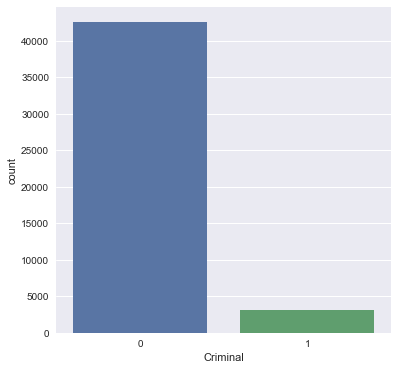

In [5]:
# get a distribution for the target
fig, axs = plt.subplots(ncols = 1, figsize=(6,6))
sns.countplot(df['Criminal'])

In [6]:
input_cols = df.columns.tolist()
input_cols.remove('Criminal')
input_cols.remove('PERID')
print (len(input_cols))

70


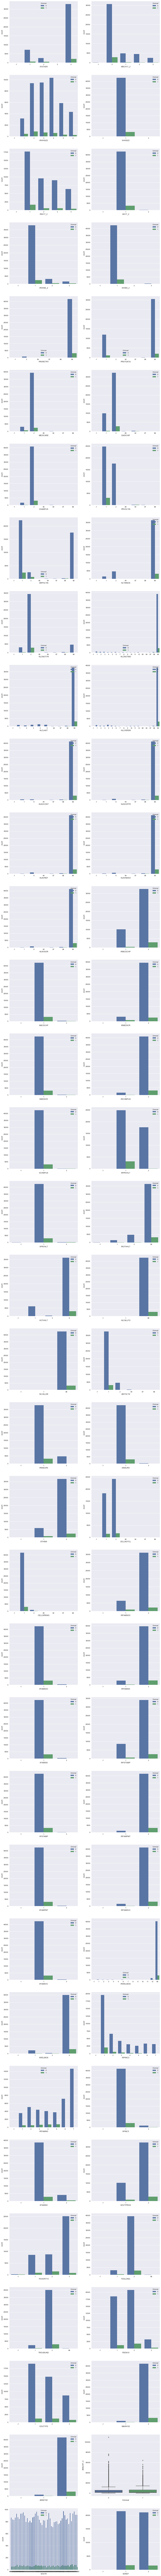

In [9]:
ncols = 2
nrows = len(input_cols)//ncols
fig, axs = plt.subplots(nrows = nrows, ncols = ncols, figsize=(16,8 * nrows))
for i in range(nrows):
    for j in range(ncols):
        if input_cols[ncols * i + j] == 'ANALWT_C':
            sns.boxplot(x ='Criminal', y = input_cols[ncols * i + j], data = df, ax = axs[i][j])
        else:
            sns.countplot(x = input_cols[ncols * i + j], hue = 'Criminal', data = df, ax = axs[i][j])